In [26]:
from torchview import draw_graph
from model import Linear_QNet, QTrainer

CUDA is available: True


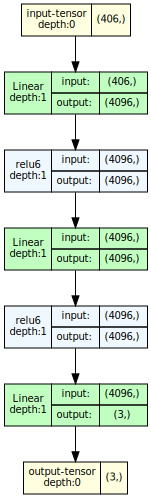

In [22]:
model = Linear_QNet(20 * 20 + 6, 4096, 4096, 3)
batch_size = 2
model_graph = draw_graph(model,input_size=(406,), device='meta')
model_graph.visual_graph

In [27]:
# Linear_QNet
# QTrainer 
import torch
from torch import nn
from matplotlib import pyplot as plt

CUDA is available: True
Model loaded successfully


TypeError: Invalid shape (406,) for image data

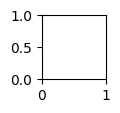

In [37]:
model = Linear_QNet(20 * 20 + 6, 4096, 4096, 3)
model.load()
# ckpt = torch.load('path_to_checkpoint')
# model.load_state_dict(ckpt['state_dict'])
filter = model.linear1.weight.data.numpy()

#(1/(2*(maximum negative value)))*filter+0.5 === you need to normalize the filter before plotting.
filter = (1/(2*3.69201088))*filter + 0.5 #Normalizing the values to [0,1]

#num_cols= choose the grid size you want
def plot_kernels(tensor, num_cols=8):
    if not tensor.ndim==4:
        print(tensor.ndim)
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i])
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
# exec
plot_kernels(filter)
